In [1]:
!pip install mplsoccer

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mplsoccer.pitch import Pitch
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C://Users//User//Desktop//csv codes//data//europaFinal.csv')
df

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2066,134,46.0,Manchester United,0.0,0.0,PenaltyShootout,End,Successful,NaN,NaN,NaN
2067,0,0.0,Villarreal,0.0,0.0,PostGame,End,Successful,NaN,NaN,NaN
2068,0,0.0,Manchester United,0.0,0.0,PostGame,End,Successful,NaN,NaN,NaN
2069,0,0.0,Manchester United,0.0,0.0,PreMatch,FormationSet,Successful,NaN,NaN,NaN


In [6]:
manUtd = df[df['teamId'] == 'Manchester United']
manUtd

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
7,0,35.0,Manchester United,66.4,97.4,FirstHalf,Tackle,Successful,10.0,NaN,NaN
11,0,55.0,Manchester United,70.0,46.7,FirstHalf,Foul,Unsuccessful,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2061,134,7.0,Manchester United,0.0,0.0,PenaltyShootout,PenaltyFaced,Unsuccessful,1.0,NaN,NaN
2063,134,44.0,Manchester United,88.5,50.0,PenaltyShootout,SavedShot,Successful,1.0,NaN,NaN
2066,134,46.0,Manchester United,0.0,0.0,PenaltyShootout,End,Successful,NaN,NaN,NaN
2068,0,0.0,Manchester United,0.0,0.0,PostGame,End,Successful,NaN,NaN,NaN


In [7]:
manUtd_passes = manUtd[manUtd['type'] == 'Pass']
manUtd_passes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2
...,...,...,...,...,...,...,...,...,...,...,...
2004,123,18.0,Manchester United,9.5,100.0,SecondPeriodOfExtraTime,Pass,Successful,23.0,26.6,97.4
2007,123,19.0,Manchester United,26.5,97.2,SecondPeriodOfExtraTime,Pass,Successful,7.0,30.8,88.0
2008,123,21.0,Manchester United,30.8,88.0,SecondPeriodOfExtraTime,Pass,Successful,17.0,33.4,80.3
2009,123,21.0,Manchester United,33.4,80.3,SecondPeriodOfExtraTime,Pass,Unsuccessful,8.0,27.9,85.9


In [9]:
manUtd_passes1 = manUtd_passes[manUtd_passes['period'] == 'FirstHalf']
manUtd_passes1

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2
...,...,...,...,...,...,...,...,...,...,...,...
752,45,12.0,Manchester United,67.9,29.1,FirstHalf,Pass,Successful,18.0,57.1,11.7
753,45,14.0,Manchester United,57.1,11.7,FirstHalf,Pass,Successful,29.0,67.4,2.6
754,45,20.0,Manchester United,97.7,26.7,FirstHalf,Pass,Unsuccessful,11.0,95.0,49.0
758,46,1.0,Manchester United,70.8,100.0,FirstHalf,Pass,Unsuccessful,23.0,91.0,74.8


In [10]:
manUtd_successfullPasses1 = manUtd_passes1[manUtd_passes1['outcome'] == 'Successful']
manUtd_successfullPasses1

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5
...,...,...,...,...,...,...,...,...,...,...,...
749,45,4.0,Manchester United,39.7,91.4,FirstHalf,Pass,Successful,2.0,40.8,62.9
750,45,8.0,Manchester United,42.6,57.5,FirstHalf,Pass,Successful,3.0,48.7,34.2
751,45,10.0,Manchester United,52.2,29.5,FirstHalf,Pass,Successful,39.0,67.9,29.1
752,45,12.0,Manchester United,67.9,29.1,FirstHalf,Pass,Successful,18.0,57.1,11.7


In [17]:
manUtd_successfullPasses1['passer'] = manUtd_successfullPasses1['playerId']
manUtd_successfullPasses1['recipient'] = manUtd_successfullPasses1['playerId'].shift(-1)

C:\Users\User\AppData\Local\Temp\ipykernel_4324\3662383744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_successfullPasses1['passer'] = manUtd_successfullPasses1['playerId']
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3662383744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_successfullPasses1['recipient'] = manUtd_successfullPasses1['playerId'].shift(-1)


In [18]:
manUtd_successfullPasses1

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,11.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11.0,23.0
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23.0,2.0
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2.0,1.0
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,45,4.0,Manchester United,39.7,91.4,FirstHalf,Pass,Successful,2.0,40.8,62.9,2.0,3.0
750,45,8.0,Manchester United,42.6,57.5,FirstHalf,Pass,Successful,3.0,48.7,34.2,3.0,39.0
751,45,10.0,Manchester United,52.2,29.5,FirstHalf,Pass,Successful,39.0,67.9,29.1,39.0,18.0
752,45,12.0,Manchester United,67.9,29.1,FirstHalf,Pass,Successful,18.0,57.1,11.7,18.0,29.0


In [19]:
manUtd_successfullPasses1.dropna()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,11.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11.0,23.0
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23.0,2.0
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2.0,1.0
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,44,43.0,Manchester United,63.0,18.5,FirstHalf,Pass,Successful,29.0,72.7,15.9,29.0,2.0
749,45,4.0,Manchester United,39.7,91.4,FirstHalf,Pass,Successful,2.0,40.8,62.9,2.0,3.0
750,45,8.0,Manchester United,42.6,57.5,FirstHalf,Pass,Successful,3.0,48.7,34.2,3.0,39.0
751,45,10.0,Manchester United,52.2,29.5,FirstHalf,Pass,Successful,39.0,67.9,29.1,39.0,18.0


In [20]:
pas = pd.to_numeric(manUtd_successfullPasses1['passer'], downcast = 'integer')
rec = pd.to_numeric(manUtd_successfullPasses1['recipient'], downcast = 'integer')

manUtd_successfullPasses1['passer'] = pas
manUtd_successfullPasses1['recipient'] = rec
manUtd_successfullPasses1

C:\Users\User\AppData\Local\Temp\ipykernel_4324\2366810088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_successfullPasses1['passer'] = pas
C:\Users\User\AppData\Local\Temp\ipykernel_4324\2366810088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_successfullPasses1['recipient'] = rec


,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18,11.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11,23.0
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23,2.0
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2,1.0
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,45,4.0,Manchester United,39.7,91.4,FirstHalf,Pass,Successful,2.0,40.8,62.9,2,3.0
750,45,8.0,Manchester United,42.6,57.5,FirstHalf,Pass,Successful,3.0,48.7,34.2,3,39.0
751,45,10.0,Manchester United,52.2,29.5,FirstHalf,Pass,Successful,39.0,67.9,29.1,39,18.0
752,45,12.0,Manchester United,67.9,29.1,FirstHalf,Pass,Successful,18.0,57.1,11.7,18,29.0


In [21]:
manUtd_successfullPasses1

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18,11.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11,23.0
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23,2.0
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2,1.0
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,45,4.0,Manchester United,39.7,91.4,FirstHalf,Pass,Successful,2.0,40.8,62.9,2,3.0
750,45,8.0,Manchester United,42.6,57.5,FirstHalf,Pass,Successful,3.0,48.7,34.2,3,39.0
751,45,10.0,Manchester United,52.2,29.5,FirstHalf,Pass,Successful,39.0,67.9,29.1,39,18.0
752,45,12.0,Manchester United,67.9,29.1,FirstHalf,Pass,Successful,18.0,57.1,11.7,18,29.0


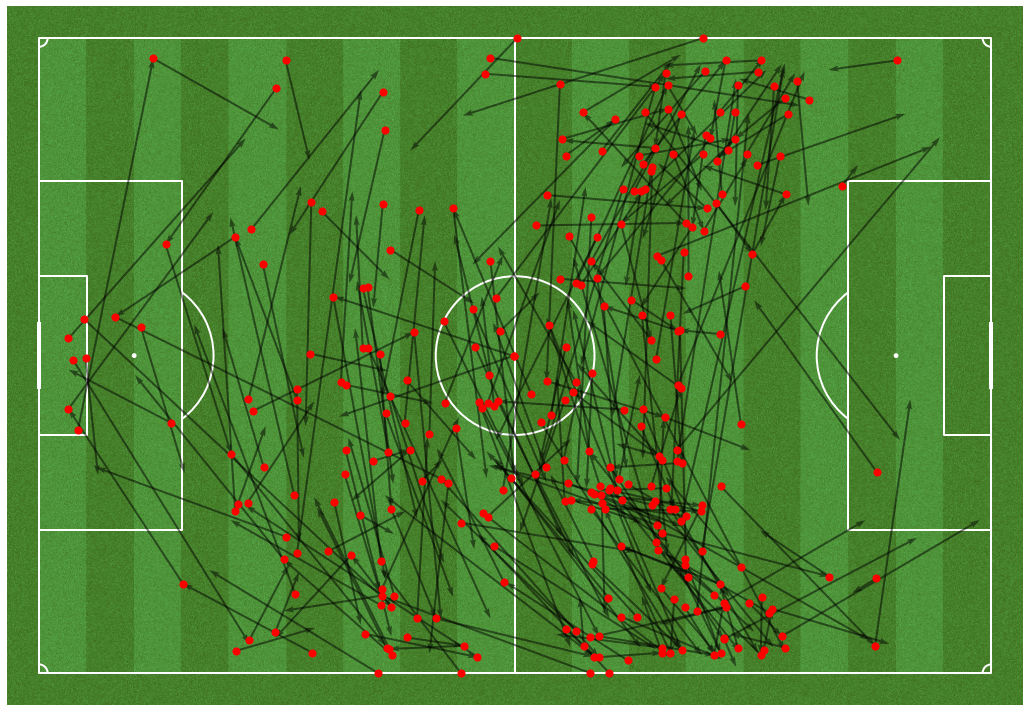

In [26]:
pitch = Pitch(pitch_type = 'statsbomb', half = False,  pitch_color = 'grass', 
             line_color = 'white', stripe = True, corner_arcs = True)
fig, ax = pitch.draw(figsize = (16, 10))

pitch.arrows(1.2 * manUtd_successfullPasses1.x, 0.8 * manUtd_successfullPasses1.y, 
            1.2 * manUtd_successfullPasses1.endX, 0.8 * manUtd_successfullPasses1.endY, ax = ax, 
            width = 2, headwidth = 3, zorder = 1, alpha = 0.5)
nodes = pitch.scatter(1.2 * manUtd_successfullPasses1.x, 0.8 * manUtd_successfullPasses1.y, color = 'red', ax = ax, 
                     zorder = 1, alpha = 1, s = 50)

In [30]:
manUtd_successfullPasses = manUtd_passes[manUtd_passes['outcome'] == 'Successful']
manUtd_successfullPasses

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5
...,...,...,...,...,...,...,...,...,...,...,...
1962,119,36.0,Manchester United,42.6,95.4,SecondPeriodOfExtraTime,Pass,Successful,23.0,46.6,75.3
1964,119,38.0,Manchester United,46.6,75.3,SecondPeriodOfExtraTime,Pass,Successful,10.0,45.8,50.9
2004,123,18.0,Manchester United,9.5,100.0,SecondPeriodOfExtraTime,Pass,Successful,23.0,26.6,97.4
2007,123,19.0,Manchester United,26.5,97.2,SecondPeriodOfExtraTime,Pass,Successful,7.0,30.8,88.0


In [36]:
manUtd_unsuccessfullPasses = manUtd_passes[manUtd_passes['outcome'] == 'Unsuccessful']
manUtd_unsuccessfullPasses

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2
63,3,2.0,Manchester United,35.3,40.3,FirstHalf,Pass,Unsuccessful,2.0,64.9,100.0
81,4,19.0,Manchester United,75.1,93.5,FirstHalf,Pass,Unsuccessful,10.0,81.3,92.3
...,...,...,...,...,...,...,...,...,...,...,...
1958,119,27.0,Manchester United,39.6,34.9,SecondPeriodOfExtraTime,Pass,Unsuccessful,21.0,54.9,41.3
1965,119,42.0,Manchester United,43.3,44.3,SecondPeriodOfExtraTime,Pass,Unsuccessful,39.0,61.0,0.0
1985,120,58.0,Manchester United,30.6,75.9,SecondPeriodOfExtraTime,Pass,Unsuccessful,2.0,67.9,50.9
2009,123,21.0,Manchester United,33.4,80.3,SecondPeriodOfExtraTime,Pass,Unsuccessful,8.0,27.9,85.9


In [39]:
manUtd_unsuccessfullPasses['passer'] = manUtd_unsuccessfullPasses['playerId']
manUtd_unsuccessfullPasses['recipient'] = manUtd_unsuccessfullPasses['playerId'].shift(-1)
manUtd_unsuccessfullPasses.dropna()
manUtd_unsuccessfullPasses

C:\Users\User\AppData\Local\Temp\ipykernel_4324\3882694688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_unsuccessfullPasses['passer'] = manUtd_unsuccessfullPasses['playerId']
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3882694688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_unsuccessfullPasses['recipient'] = manUtd_unsuccessfullPasses['playerId'].shift(-1)


,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0,2.0,18.0
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4,18.0,18.0
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2,18.0,2.0
63,3,2.0,Manchester United,35.3,40.3,FirstHalf,Pass,Unsuccessful,2.0,64.9,100.0,2.0,10.0
81,4,19.0,Manchester United,75.1,93.5,FirstHalf,Pass,Unsuccessful,10.0,81.3,92.3,10.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,119,27.0,Manchester United,39.6,34.9,SecondPeriodOfExtraTime,Pass,Unsuccessful,21.0,54.9,41.3,21.0,39.0
1965,119,42.0,Manchester United,43.3,44.3,SecondPeriodOfExtraTime,Pass,Unsuccessful,39.0,61.0,0.0,39.0,2.0
1985,120,58.0,Manchester United,30.6,75.9,SecondPeriodOfExtraTime,Pass,Unsuccessful,2.0,67.9,50.9,2.0,8.0
2009,123,21.0,Manchester United,33.4,80.3,SecondPeriodOfExtraTime,Pass,Unsuccessful,8.0,27.9,85.9,8.0,23.0


In [31]:
manUtd_successfullPasses['passer'] = manUtd_successfullPasses['playerId']
manUtd_successfullPasses['recipient'] = manUtd_successfullPasses['playerId'].shift(-1)
manUtd_successfullPasses

C:\Users\User\AppData\Local\Temp\ipykernel_4324\2739924669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_successfullPasses['passer'] = manUtd_successfullPasses['playerId']
C:\Users\User\AppData\Local\Temp\ipykernel_4324\2739924669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manUtd_successfullPasses['recipient'] = manUtd_successfullPasses['playerId'].shift(-1)


,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,11.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11.0,23.0
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23.0,2.0
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2.0,1.0
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,119,36.0,Manchester United,42.6,95.4,SecondPeriodOfExtraTime,Pass,Successful,23.0,46.6,75.3,23.0,10.0
1964,119,38.0,Manchester United,46.6,75.3,SecondPeriodOfExtraTime,Pass,Successful,10.0,45.8,50.9,10.0,23.0
2004,123,18.0,Manchester United,9.5,100.0,SecondPeriodOfExtraTime,Pass,Successful,23.0,26.6,97.4,23.0,7.0
2007,123,19.0,Manchester United,26.5,97.2,SecondPeriodOfExtraTime,Pass,Successful,7.0,30.8,88.0,7.0,17.0


In [76]:
penandes = manUtd_passes[manUtd_passes['playerId'] == 18.0]
penandes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8
130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8
133,7,1.0,Manchester United,84.3,23.3,FirstHalf,Pass,Successful,18.0,86.0,20.0
185,12,20.0,Manchester United,39.0,64.8,FirstHalf,Pass,Successful,18.0,32.8,72.9
197,12,50.0,Manchester United,43.0,70.0,FirstHalf,Pass,Successful,18.0,41.0,96.9
205,13,14.0,Manchester United,65.1,92.3,FirstHalf,Pass,Unsuccessful,18.0,67.4,89.7
270,18,18.0,Manchester United,73.5,92.7,FirstHalf,Pass,Unsuccessful,18.0,88.4,58.4


In [81]:
penandes['passer'] = manUtd_passes['playerId']
penandes['recipient'] = manUtd_passes['playerId'].shift(-1)
penandes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,2.0
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4,18.0,18.0
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2,18.0,23.0
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8,18.0,23.0
130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8,18.0,11.0
133,7,1.0,Manchester United,84.3,23.3,FirstHalf,Pass,Successful,18.0,86.0,20.0,18.0,6.0
185,12,20.0,Manchester United,39.0,64.8,FirstHalf,Pass,Successful,18.0,32.8,72.9,18.0,6.0
197,12,50.0,Manchester United,43.0,70.0,FirstHalf,Pass,Successful,18.0,41.0,96.9,18.0,23.0
205,13,14.0,Manchester United,65.1,92.3,FirstHalf,Pass,Unsuccessful,18.0,67.4,89.7,18.0,1.0
270,18,18.0,Manchester United,73.5,92.7,FirstHalf,Pass,Unsuccessful,18.0,88.4,58.4,18.0,3.0


In [82]:
penandes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,2.0
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4,18.0,18.0
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2,18.0,23.0
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8,18.0,23.0
130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8,18.0,11.0
133,7,1.0,Manchester United,84.3,23.3,FirstHalf,Pass,Successful,18.0,86.0,20.0,18.0,6.0
185,12,20.0,Manchester United,39.0,64.8,FirstHalf,Pass,Successful,18.0,32.8,72.9,18.0,6.0
197,12,50.0,Manchester United,43.0,70.0,FirstHalf,Pass,Successful,18.0,41.0,96.9,18.0,23.0
205,13,14.0,Manchester United,65.1,92.3,FirstHalf,Pass,Unsuccessful,18.0,67.4,89.7,18.0,1.0
270,18,18.0,Manchester United,73.5,92.7,FirstHalf,Pass,Unsuccessful,18.0,88.4,58.4,18.0,3.0


In [71]:
penandes.shape

(59, 13)

In [32]:
penandes_passes = manUtd_successfullPasses[manUtd['playerId'] == 18.0]
penandes_passes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,11.0
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8,18.0,7.0
130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8,18.0,11.0
133,7,1.0,Manchester United,84.3,23.3,FirstHalf,Pass,Successful,18.0,86.0,20.0,18.0,6.0
185,12,20.0,Manchester United,39.0,64.8,FirstHalf,Pass,Successful,18.0,32.8,72.9,18.0,6.0
197,12,50.0,Manchester United,43.0,70.0,FirstHalf,Pass,Successful,18.0,41.0,96.9,18.0,23.0
286,19,9.0,Manchester United,69.5,74.5,FirstHalf,Pass,Successful,18.0,59.9,71.1,18.0,2.0
336,22,57.0,Manchester United,37.0,89.6,FirstHalf,Pass,Successful,18.0,32.8,81.4,18.0,6.0
366,24,43.0,Manchester United,71.7,24.6,FirstHalf,Pass,Successful,18.0,70.9,9.7,18.0,29.0
434,30,5.0,Manchester United,49.9,50.1,FirstHalf,Pass,Successful,18.0,31.0,40.7,18.0,3.0


In [40]:
penandes_unsuccessfullPasses = manUtd_unsuccessfullPasses[manUtd['playerId'] == 18.0]
penandes_unsuccessfullPasses

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4,18.0,18.0
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2,18.0,2.0
205,13,14.0,Manchester United,65.1,92.3,FirstHalf,Pass,Unsuccessful,18.0,67.4,89.7,18.0,1.0
270,18,18.0,Manchester United,73.5,92.7,FirstHalf,Pass,Unsuccessful,18.0,88.4,58.4,18.0,29.0
497,32,42.0,Manchester United,69.1,15.3,FirstHalf,Pass,Unsuccessful,18.0,88.5,50.3,18.0,29.0
925,51,23.0,Manchester United,78.0,27.0,SecondHalf,Pass,Unsuccessful,18.0,85.9,25.0,18.0,18.0
932,52,27.0,Manchester United,93.1,10.4,SecondHalf,Pass,Unsuccessful,18.0,100.0,47.3,18.0,7.0
1111,63,46.0,Manchester United,76.9,9.1,SecondHalf,Pass,Unsuccessful,18.0,86.5,33.4,18.0,29.0
1181,67,51.0,Manchester United,73.7,84.8,SecondHalf,Pass,Unsuccessful,18.0,96.8,43.1,18.0,11.0
1646,96,8.0,Manchester United,38.2,25.2,FirstPeriodOfExtraTime,Pass,Unsuccessful,18.0,73.8,53.1,18.0,39.0


penandes_passes.shape, penandes_unsuccessfullPasses.shape

(0.0, 80.0)

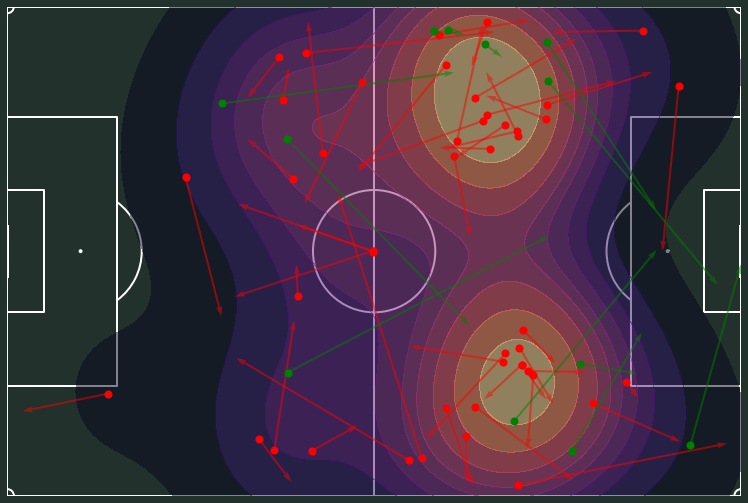

In [114]:
# using Pitch pass network

'''pitch = Pitch(pitch_type = 'statsbomb', half = False,  pitch_color = '#22312b', 
             line_color = 'white', corner_arcs = True)
fig, ax = pitch.draw(figsize = (16, 10))'''

fig, ax = plt.subplots(figsize = (15, 9))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type = 'statsbomb', half = False,  pitch_color = '#22312b', 
             line_color = 'white', corner_arcs = True)
pitch.draw(ax = ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
    penandes['x'], 
    penandes['y'], 
    shade = True, 
    shade_lowest = False, 
    alpha = 0.5, 
    n_levels = 10, 
    cmap = 'magma'
)

pitch.arrows(1.2 * penandes_passes.x, 0.8 * penandes_passes.y, 
            1.2 * penandes_passes.endX, 0.8 * penandes_passes.endY, ax = ax, 
            width = 2, headwidth = 3, zorder = 1, alpha = 0.5, color = 'red')
pitch.arrows(1.2 * penandes_unsuccessfullPasses.x, 0.8 * penandes_unsuccessfullPasses.y, 
            1.2 * penandes_unsuccessfullPasses.endX, 0.8 * penandes_unsuccessfullPasses.endY, ax = ax, 
            width = 2, headwidth = 3, zorder = 1, alpha = 0.5, color = 'green')
nodes = pitch.scatter(1.2 * penandes_passes.x, 0.8 * penandes_passes.y, color = 'red', ax = ax, 
                     zorder = 1, alpha = 1, s = 50)
nodes = pitch.scatter(1.2 * penandes_unsuccessfullPasses.x, 0.8 * penandes_unsuccessfullPasses.y, color = 'green', ax = ax, 
                     zorder = 1, alpha = 1, s = 50)

'''pitch.arrows(penandes.x, penandes.y, 
            penandes.endX, penandes.endY, ax = ax, 
            width = 2, headwidth = 3, zorder = 1, alpha = 0.5, color = 'red')
nodes = pitch.scatter(penandes.x, penandes.y, color = 'red', ax = ax, 
                     zorder = 1, alpha = 1, s = 50)'''

plt.xlim(0, 120)
plt.ylim(0, 80)

In [83]:
penandes['x'] = penandes['x'] * 1.2
penandes['y'] = penandes['y'] * 0.8
penandes['endX'] = penandes['endX'] * 1.2
penandes['endY'] = penandes['endY'] * 0.8

In [87]:
penandes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,0,0.0,Manchester United,59.88,40.00,FirstHalf,Pass,Successful,18.0,37.80,47.68,18.0,2.0
34,2,9.0,Manchester United,69.72,76.00,FirstHalf,Pass,Unsuccessful,18.0,74.88,75.52,18.0,18.0
41,2,12.0,Manchester United,72.12,76.16,FirstHalf,Pass,Unsuccessful,18.0,73.56,76.16,18.0,23.0
119,6,11.0,Manchester United,78.48,77.44,FirstHalf,Pass,Successful,18.0,75.96,70.24,18.0,23.0
130,6,55.0,Manchester United,83.76,24.24,FirstHalf,Pass,Successful,18.0,89.28,15.04,18.0,11.0
133,7,1.0,Manchester United,101.16,18.64,FirstHalf,Pass,Successful,18.0,103.20,16.00,18.0,6.0
185,12,20.0,Manchester United,46.80,51.84,FirstHalf,Pass,Successful,18.0,39.36,58.32,18.0,6.0
197,12,50.0,Manchester United,51.60,56.00,FirstHalf,Pass,Successful,18.0,49.20,77.52,18.0,23.0
205,13,14.0,Manchester United,78.12,73.84,FirstHalf,Pass,Unsuccessful,18.0,80.88,71.76,18.0,1.0
270,18,18.0,Manchester United,88.20,74.16,FirstHalf,Pass,Unsuccessful,18.0,106.08,46.72,18.0,3.0


KeyError: 0

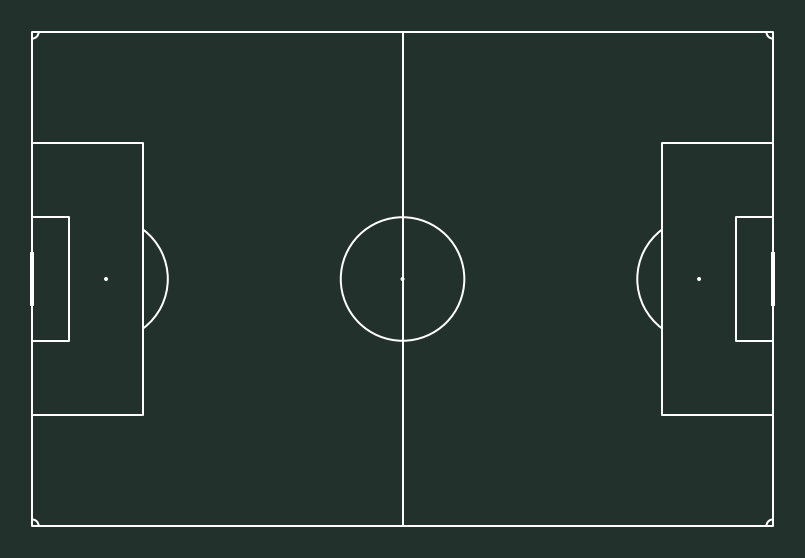

In [94]:
# using seaborn heatmap

fig, ax = plt.subplots(figsize = (16, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type = 'statsbomb', half = False,  pitch_color = '#22312b', 
             line_color = 'white', corner_arcs = True)
pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for i in range(len(penandes['x'])):
    if penandes["outcome"][i] == 'Successful':
        plt.plot(penandes["x"][i], penandes["endX"][i], penandes["y"][i], penandes["endY"][i], color = 'red')
        plt.scatter(penandes["x"][i], penandes["y"][i], color = 'red')
    if penandes["outcome"][i] == 'Unsuccessful':
        plt.plot(penandes["x"][i], penandes["endX"][i], penandes["y"][i], penandes["endY"][i], color = 'green')
        plt.scatter(penandes["x"][i], penandes["y"][i], color = 'green')

plt.xlim(0, 120)
plt.ylim(0, 80)